In [244]:
%matplotlib inline

from datetime import datetime

import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn import linear_model

In [192]:
df = pd.read_csv("data/gemini_BTCUSD_day.csv", # http://www.cryptodatadownload.com/data/gemini/
                 names=["unix_ts", "datetime", "symbol", "open", "high", "low", "close", "volume"],
                 index_col="datetime", skiprows=2, parse_dates=True)

<div style="page-break-after: always;"></div>

In [193]:
df.sort_values(by=['datetime'], inplace=True)
df.sample(10)

,unix_ts,symbol,open,high,low,close,volume
datetime,,,,,,,
2018-08-10 04:00:00,1533873600000,BTCUSD,6467.92,6467.92,6467.92,6467.92,0.000000
2018-08-08 04:00:00,1533700800000,BTCUSD,6588.97,6588.97,6104.82,6320.19,5458.900373
2017-04-30 04:00:00,1493524800,BTCUSD,1339.49,1375.00,1325.00,1373.89,2256.766075
2020-01-10 04:00:00,1578628800000,BTCUSD,7804.00,8250.00,7676.00,8160.66,1154.199165
2021-01-26 04:00:00,1611633600000,BTCUSD,31557.64,32951.00,30833.97,31852.60,2542.856868
2016-03-28 04:00:00,1459137600,BTCUSD,422.89,423.99,422.00,423.74,892.972502
2019-10-11 04:00:00,1570766400000,BTCUSD,8578.48,8812.61,8213.25,8318.12,1608.819880
2016-09-22 04:00:00,1474516800,BTCUSD,595.70,596.17,593.82,595.14,2933.703424
2018-03-03 04:00:00,1520049600000,BTCUSD,11283.37,11484.98,11109.00,11158.51,1638.812394


Plot our raw data and add a 20-day moving average:

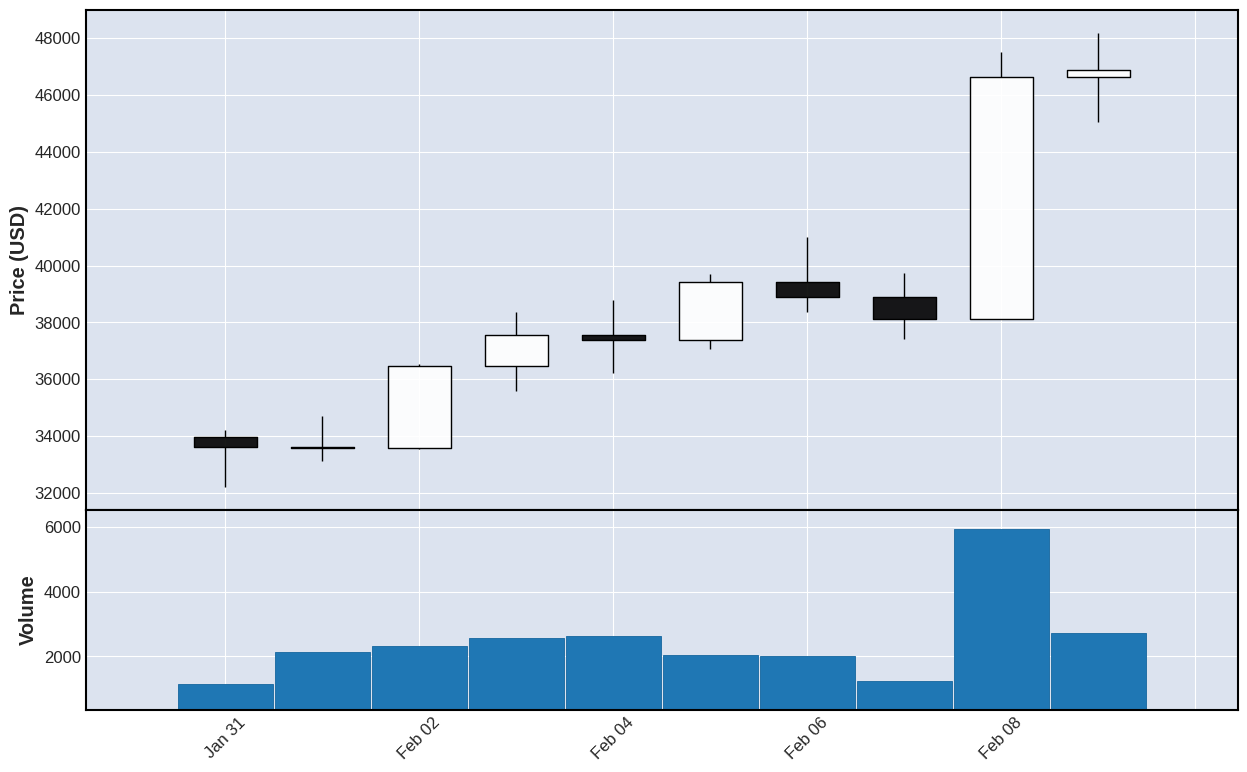

In [194]:
mpf.plot(df.loc['2021-01-31':'2021-03-16'], ylabel='Price (USD)', volume=True, type='candle', figsize=(16, 10))

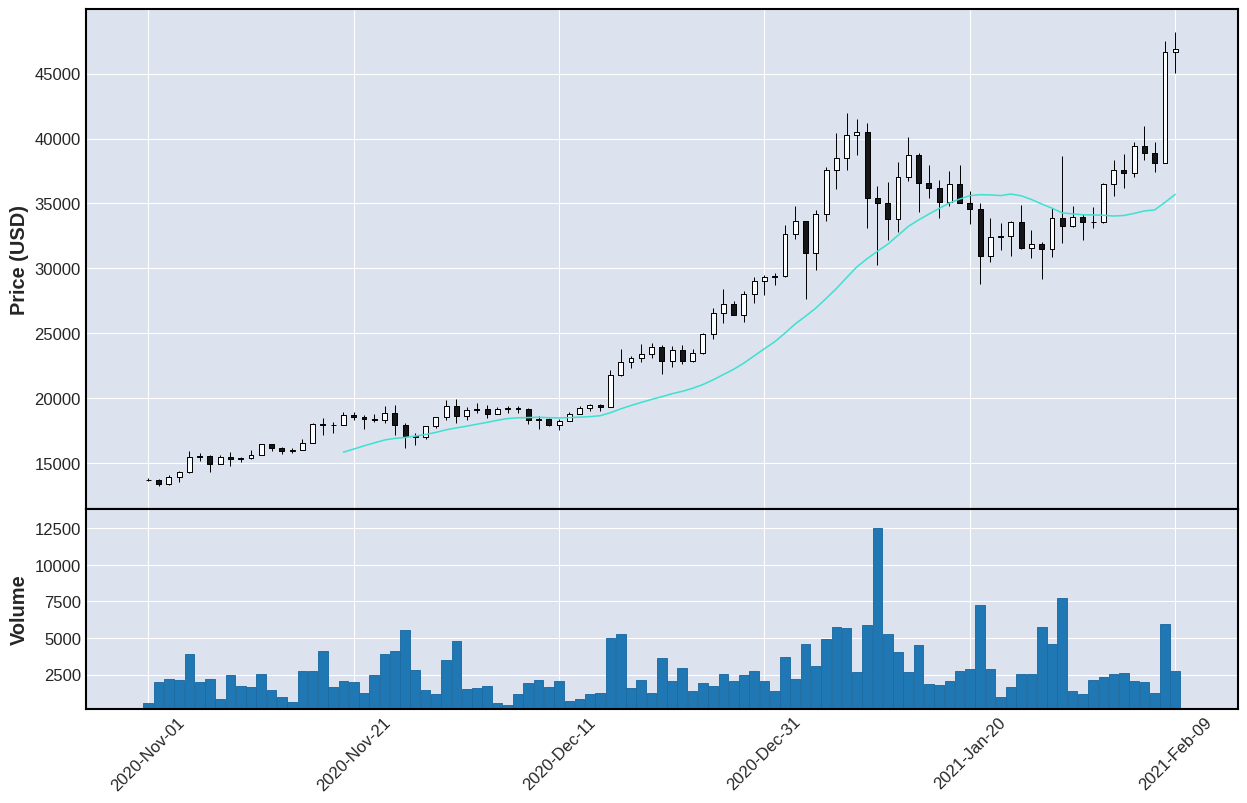

In [6]:
mpf.plot(df.loc['2020-11-01':'2021-02-16'], ylabel='Price (USD)', mav=20, volume=True, type='candle',
         figsize=(16, 10))

Lets try to look at the log of the price:
==========================================

In [195]:
df["ln_price"] = np.log(df["close"])

In [196]:
last_block = 676707 # Now
last_time = datetime(2021, 3, 28, 16, 23) # Now
blocks_per_day = 6 * 24 # on average
df["day_number"] = (df.index - last_time).days + last_block // blocks_per_day

In [197]:
df["ln_day_num"] = np.log(df["day_number"])

In [198]:
df

,unix_ts,symbol,open,high,low,close,volume,ln_price,day_number,ln_day_num
datetime,,,,,,,,,,
2015-10-08 04:00:00,1444276800,BTCUSD,0.00,245.00,0.00,243.60,34.754703,5.495528,2700,7.901007
2015-10-09 04:00:00,1444363200,BTCUSD,243.60,249.97,243.60,245.51,61.587068,5.503338,2701,7.901377
2015-10-10 04:00:00,1444449600,BTCUSD,245.51,246.30,244.60,246.30,30.870549,5.506550,2702,7.901748
2015-10-11 04:00:00,1444536000,BTCUSD,246.30,249.50,245.96,248.98,22.747091,5.517373,2703,7.902118
2015-10-12 04:00:00,1444622400,BTCUSD,248.98,248.98,245.75,245.75,71.047743,5.504315,2704,7.902487
...,...,...,...,...,...,...,...,...,...,...
2021-02-05 04:00:00,1612497600000,BTCUSD,37380.18,39700.00,37057.78,39415.76,2032.777336,10.581921,4647,8.443977
2021-02-06 04:00:00,1612584000000,BTCUSD,39415.76,41000.00,38368.69,38897.95,2002.105270,10.568697,4648,8.444192
2021-02-07 04:00:00,1612670400000,BTCUSD,38897.95,39748.96,37400.00,38107.34,1239.870461,10.548162,4649,8.444407


<AxesSubplot:xlabel='day_number', ylabel='Ln(Price in USD)'>

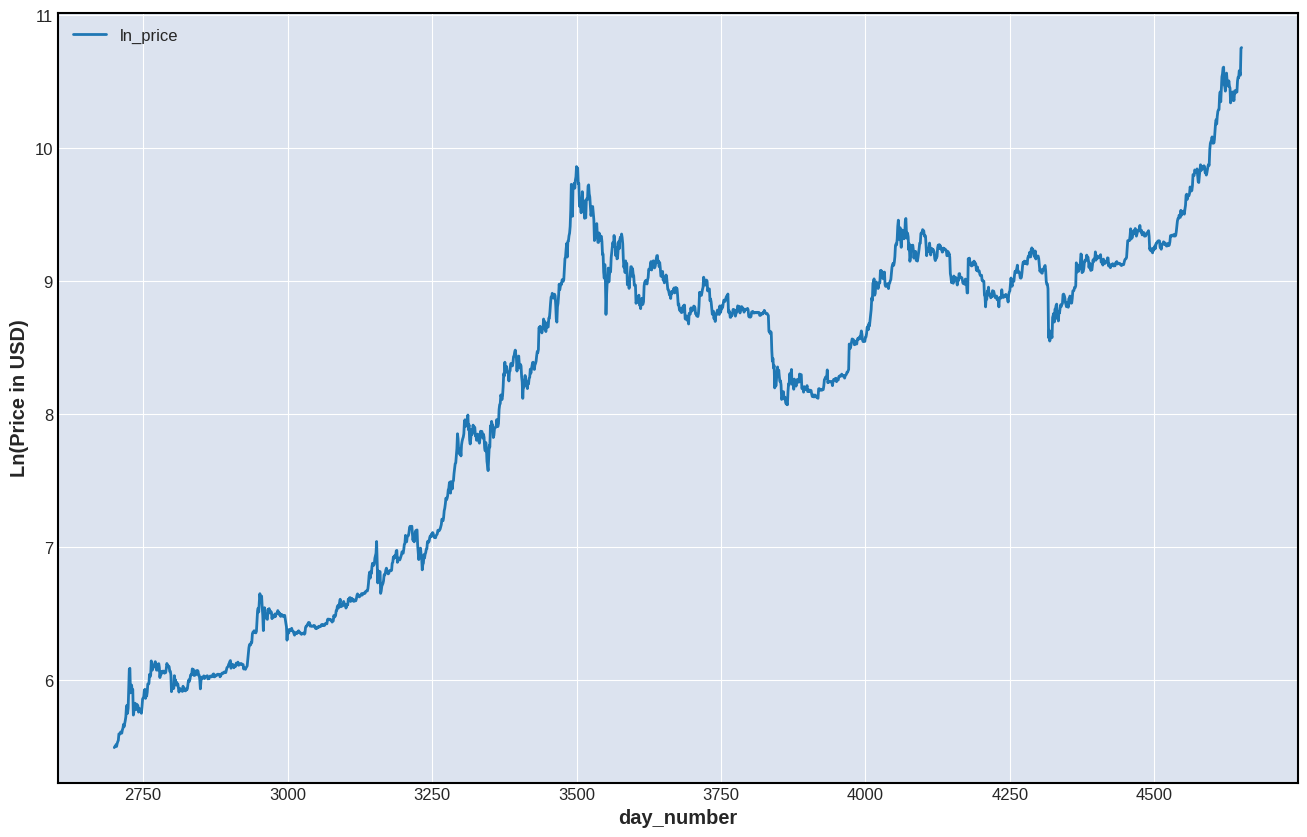

In [200]:
df.plot(x="day_number", y="ln_price", ylabel='Ln(Price in USD)', figsize=(16, 10))

In [201]:
start_block_reward = 50 # Original block reward for miners was 50 BTC
reward_interval = 210000 # 210000 is around every 4 years with a 10 minute block interval
total_supply = 21_000_000
block_in_10_years = last_block + blocks_per_day * 365 * 10

In [215]:
blocks_df = pd.DataFrame(np.arange(0, block_in_10_years, blocks_per_day), columns=["block", ])
blocks_df.index.name = "day_number"
blocks_df["reward"] = 50 * 2.0**(-1 * (blocks_df.block // reward_interval))
blocks_df["daily_supply"] = blocks_per_day * blocks_df.reward 
blocks_df["total_supply"] = blocks_df.daily_supply.cumsum()
blocks_df["mined_percentage"] = blocks_df["total_supply"] * 100 / total_supply
blocks_df["s2f"] = blocks_df.total_supply / (365 * blocks_df.daily_supply)
blocks_df["s2f_sma"] = blocks_df.s2f.rolling(365).mean()
blocks_df["ln_s2f"] = np.log(blocks_df.s2f_sma)
blocks_df

,block,reward,daily_supply,total_supply,mined_percentage,s2f,s2f_sma,ln_s2f
day_number,,,,,,,,
0,0,50.0000,7200.0,7200.0,0.034286,0.002740,NaN,NaN
1,144,50.0000,7200.0,14400.0,0.068571,0.005479,NaN,NaN
2,288,50.0000,7200.0,21600.0,0.102857,0.008219,NaN,NaN
3,432,50.0000,7200.0,28800.0,0.137143,0.010959,NaN,NaN
4,576,50.0000,7200.0,36000.0,0.171429,0.013699,NaN,NaN
...,...,...,...,...,...,...,...,...
8345,1201680,1.5625,225.0,20584350.0,98.020714,250.646575,250.147945,5.522053
8346,1201824,1.5625,225.0,20584575.0,98.021786,250.649315,250.150685,5.522063
8347,1201968,1.5625,225.0,20584800.0,98.022857,250.652055,250.153425,5.522074


In [203]:
blocks_df[last_block//blocks_per_day:last_block//blocks_per_day+1] # Status today:

,block,reward,daily_supply,total_supply,mined_percentage,s2f,s2f_sma
day_number,,,,,,,
4699,676656,6.25,900.0,18670500.0,88.907143,56.835616,53.271496


Text(0, 0.5, 'Bitcoin Reward per Block (in BTC) - Orange line')

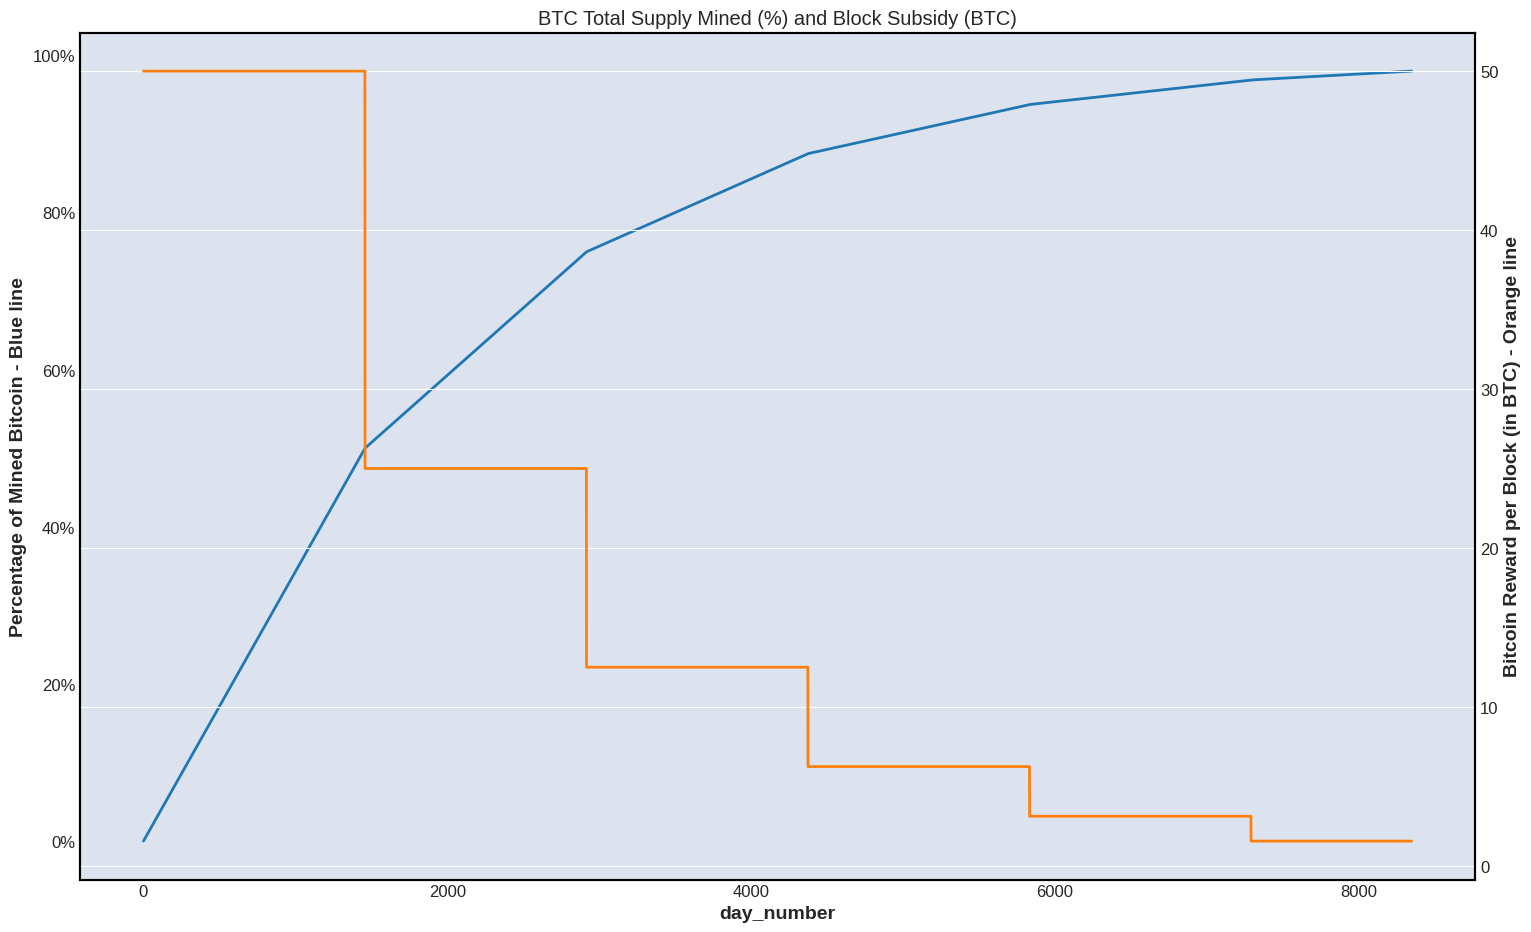

In [204]:
ax = blocks_df.mined_percentage.plot( figsize=(18, 11), title = "BTC Total Supply Mined (%) and Block Subsidy (BTC)")
ax.set_ylabel('Percentage of Mined Bitcoin - Blue line', fontsize=14)
ax.set_xlabel("Day number of existance of Bitcoin Blockchain", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax = blocks_df.reward.plot(secondary_y=True)
ax.set_ylabel('Bitcoin Reward per Block (in BTC) - Orange line', fontsize=14)

In [205]:
df.sample()

,unix_ts,symbol,open,high,low,close,volume,ln_price,day_number,ln_day_num
datetime,,,,,,,,,,
2019-05-11 04:00:00,1557547200000,BTCUSD,6554.27,7445.45,6525.52,7153.05,7639.257804,8.875294,4011,8.296796


In [217]:
merged_df = df.merge(blocks_df, how="right", on="day_number")
merged_df.dropna(subset=["ln_price"], inplace=True)
merged_df.sample()

,unix_ts,symbol,open,high,low,close,volume,ln_price,day_number,ln_day_num,block,reward,daily_supply,total_supply,mined_percentage,s2f,s2f_sma,ln_s2f
3042,1.473826e+09,BTCUSD,607.51,610.73,604.71,605.25,1312.728355,6.405642,3042,8.02027,438048,12.5,1800.0,15980400.0,76.097143,24.323288,15.974299,2.770981


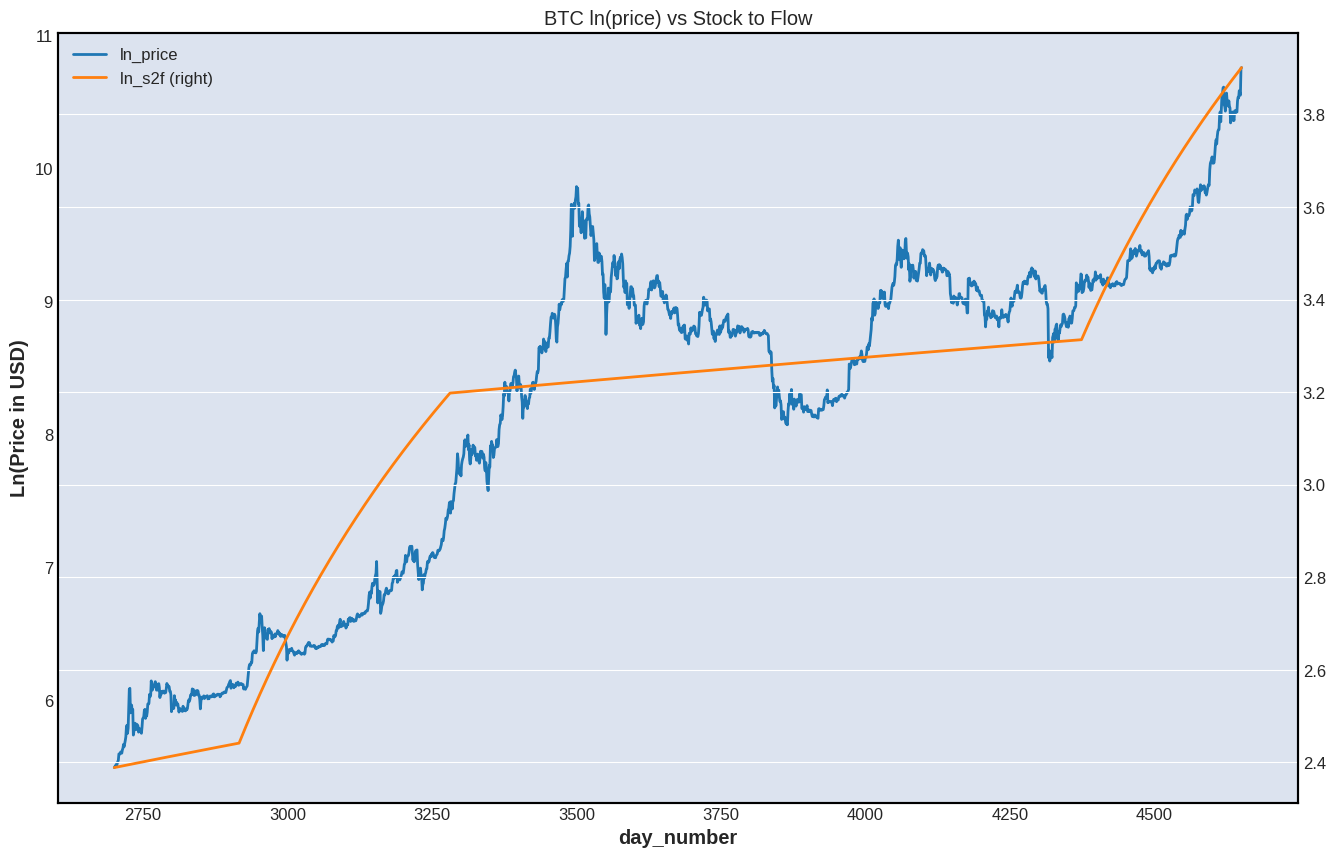

In [218]:
ax = merged_df.plot(x="day_number", y="ln_price", ylabel='Ln(Price in USD)', figsize=(16, 10), title = "BTC ln(price) vs Stock to Flow")
ax = merged_df.plot(x="day_number", y="ln_s2f", secondary_y=True, ax=ax)
# ax.set_ylabel('Stock to Flow - Orange line', fontsize=14)

Linear Regression:
==================

In [246]:
## https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
X = merged_df.day_number.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Y = (merged_df.ln_price / merged_df.ln_s2f).values.reshape(-1, 1)  # values converts it into a numpy array

In [240]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [242]:
Y_pred = regr.predict(X)  # make predictions

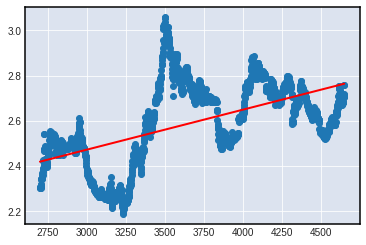

In [245]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [247]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [1.94158895]
Coefficients: 
 [[0.00017685]]


In [248]:
merged_df.sample()

,unix_ts,symbol,open,high,low,close,volume,ln_price,day_number,ln_day_num,block,reward,daily_supply,total_supply,mined_percentage,s2f,s2f_sma,ln_s2f,predicted_ln_price
3944,1.551758e+12,BTCUSD,3696.76,3876.59,3695.0,3815.83,3046.515587,8.246913,3944,8.279951,567936,12.5,1800.0,17604000.0,83.828571,26.794521,26.29589,3.269413,9.091726


predicted(ln_price / ln_s2f) =  regr.intercept_ + regr.coef_ * day_number
predicted(ln_price) = ln_s2f * (regr.intercept_ + regr.coef_ * day_number)

In [250]:
merged_df["predicted_ln_price"] = merged_df.ln_s2f * (regr.intercept_[0] + regr.coef_[0][0] * merged_df.day_number)

In [251]:
merged_df.sample()

,unix_ts,symbol,open,high,low,close,volume,ln_price,day_number,ln_day_num,block,reward,daily_supply,total_supply,mined_percentage,s2f,s2f_sma,ln_s2f,predicted_ln_price
4108,1.565928e+12,BTCUSD,10317.24,10539.73,9739.58,10306.38,2179.633514,9.240518,4108,8.320692,591552,12.5,1800.0,17899200.0,85.234286,27.243836,26.745205,3.286355,8.768286


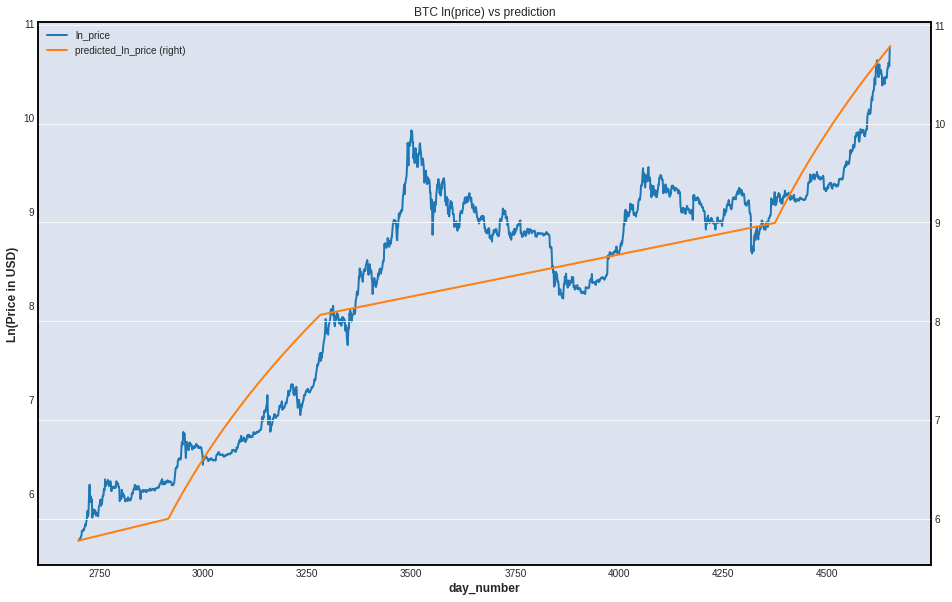

In [252]:
ax = merged_df.plot(x="day_number", y="ln_price", ylabel='Ln(Price in USD)', figsize=(16, 10), title = "BTC ln(price) vs prediction")
ax = merged_df.plot(x="day_number", y="predicted_ln_price", secondary_y=True, ax=ax)

In [4]:
df['ema'] = df.ta.ema()

In [9]:
help(ta.ema)

Help on function ema in module pandas_ta.overlap.ema:

ema(close, length=None, offset=None, **kwargs)
    Exponential Moving Average (EMA)
    
    The Exponential Moving Average is more responsive moving average compared to the
    Simple Moving Average (SMA).  The weights are determined by alpha which is
    proportional to it's length.  There are several different methods of calculating
    EMA.  One method uses just the standard definition of EMA and another uses the
    SMA to generate the initial value for the rest of the calculation.
    
    Sources:
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_averages
        https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
    
    Calculation:
        Default Inputs:
            length=10, adjust=False, sma=True
        if sma:
            sma_nth = close[0:length].sum() / length
            close[:length - 1] = np.NaN
      

In [24]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.2.42b0
Total Indicators: 129
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


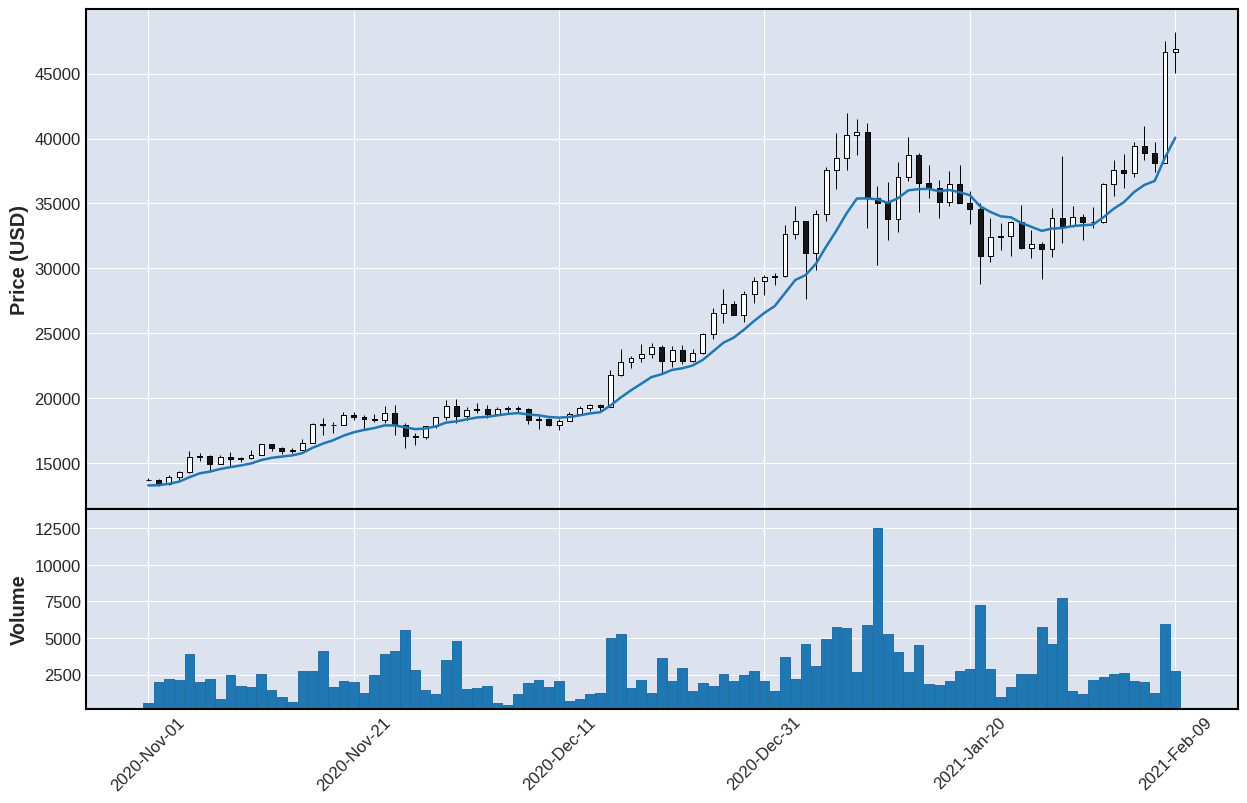

In [52]:
apdict = mpf.make_addplot(df['ema'].loc['2020-11-01':'2021-02-16'])
mpf.plot(df.loc['2020-11-01':'2021-02-16'], ylabel='Price (USD)', volume=True, addplot=apdict, type="candle",
         figsize=(16, 10))

In [5]:
e = pd.DataFrame()

e.ta.indicators()


Pandas TA - Technical Analysis Indicators - v0.2.42b0
Total Indicators: 129
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


In [13]:
df["gradient"] = np.gradient(df["ema"])

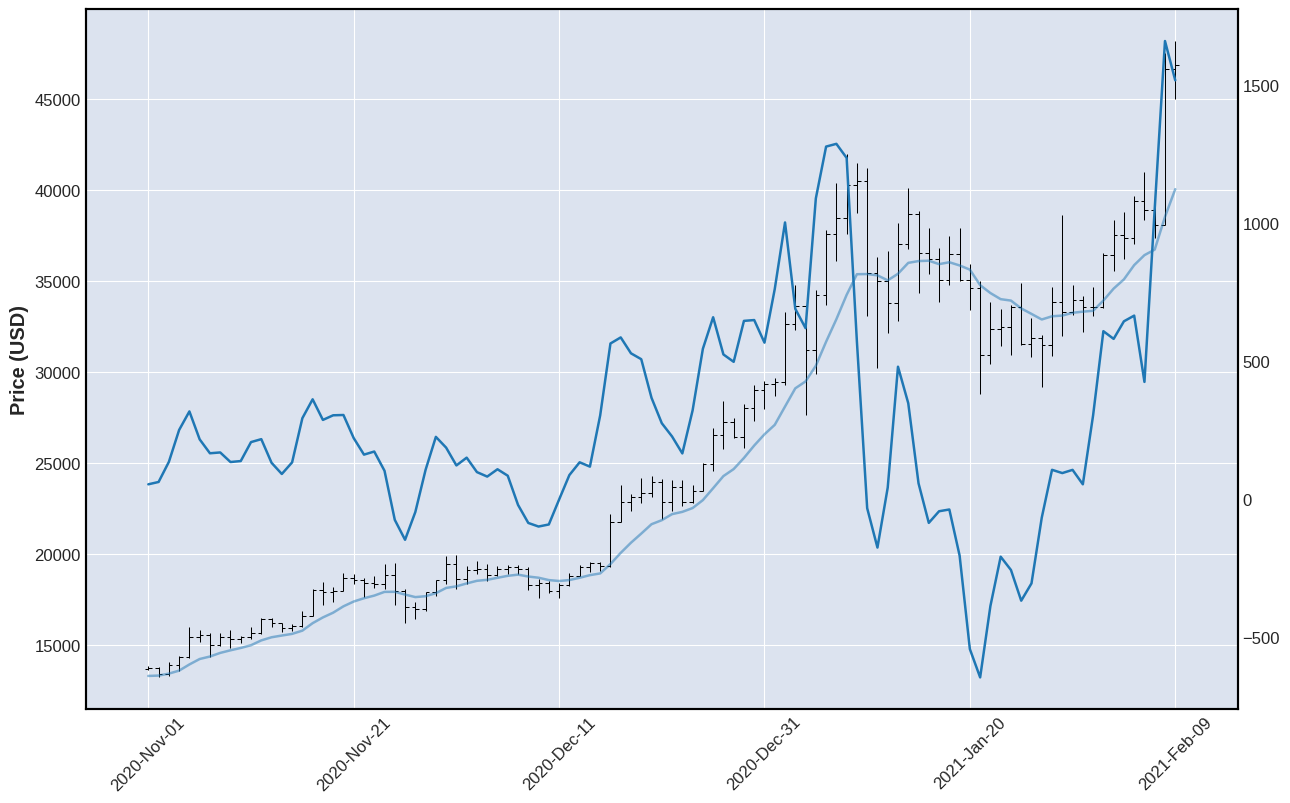

In [56]:
apdict = [mpf.make_addplot(df['ema'].loc['2020-11-01':'2021-02-16'], alpha=0.5),
          mpf.make_addplot(df['gradient'].loc['2020-11-01':'2021-02-16'])]
mpf.plot(df.loc['2020-11-01':'2021-02-16'], ylabel='Price (USD)', addplot=apdict, figsize=(16, 10))

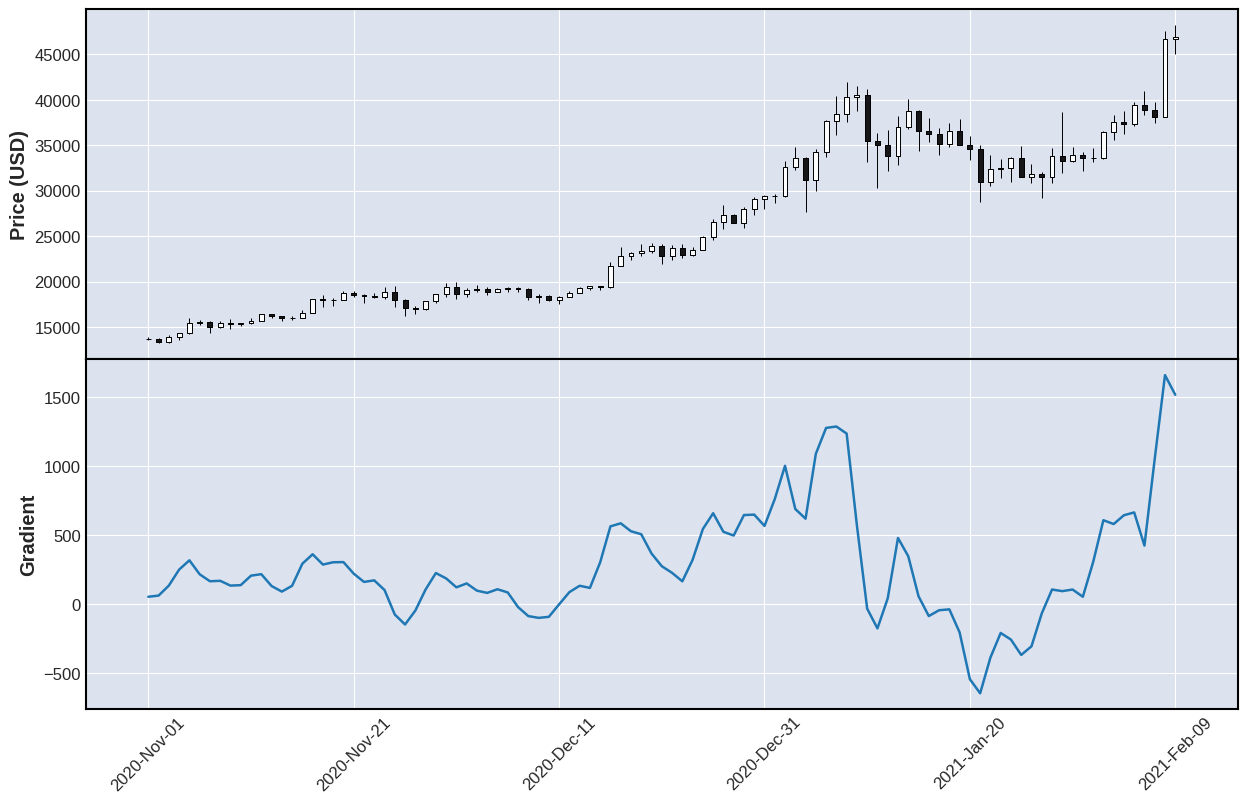

In [15]:
ap = mpf.make_addplot(df['gradient'].loc['2020-11-01':'2021-02-16'],panel=1,type='line',ylabel='Gradient')
mpf.plot(df.loc['2020-11-01':'2021-02-16'], ylabel='Price (USD)'
         ,type='candle', addplot=ap,panel_ratios=(1,1),figratio=(1,1),figscale=1.5, figsize=(16, 10))

Vortex Indicator:
------------------------
Two oscillators that capture positive and negative trend movement.


https://www.investopedia.com/terms/v/vortex-indicator-vi.asp

In [17]:
help(ta.vortex)

Help on function vortex in module pandas_ta.trend.vortex:

vortex(high, low, close, length=None, drift=None, offset=None, **kwargs)
    Vortex
    
    Two oscillators that capture positive and negative trend movement.
    
    Sources:
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:vortex_indicator
    
    Calculation:
        Default Inputs:
            length=14, drift=1
        TR = True Range
        SMA = Simple Moving Average
        tr = TR(high, low, close)
        tr_sum = tr.rolling(length).sum()
    
        vmp = (high - low.shift(drift)).abs()
        vmn = (low - high.shift(drift)).abs()
    
        VIP = vmp.rolling(length).sum() / tr_sum
        VIM = vmn.rolling(length).sum() / tr_sum
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Series): Series of 'close's
        length (int): ROC 1 period.  Default: 14
        drift (int): The difference period.   Defaul

In [18]:
df.ta.vortex()

,VTXP_14,VTXM_14
datetime,,
2015-10-08 04:00:00,NaN,NaN
2015-10-09 04:00:00,NaN,NaN
2015-10-10 04:00:00,NaN,NaN
2015-10-11 04:00:00,NaN,NaN
2015-10-12 04:00:00,NaN,NaN
...,...,...
2021-02-05 04:00:00,1.164964,0.854177
2021-02-06 04:00:00,1.170950,0.814341
2021-02-07 04:00:00,1.160481,0.848618


Trix:
-------

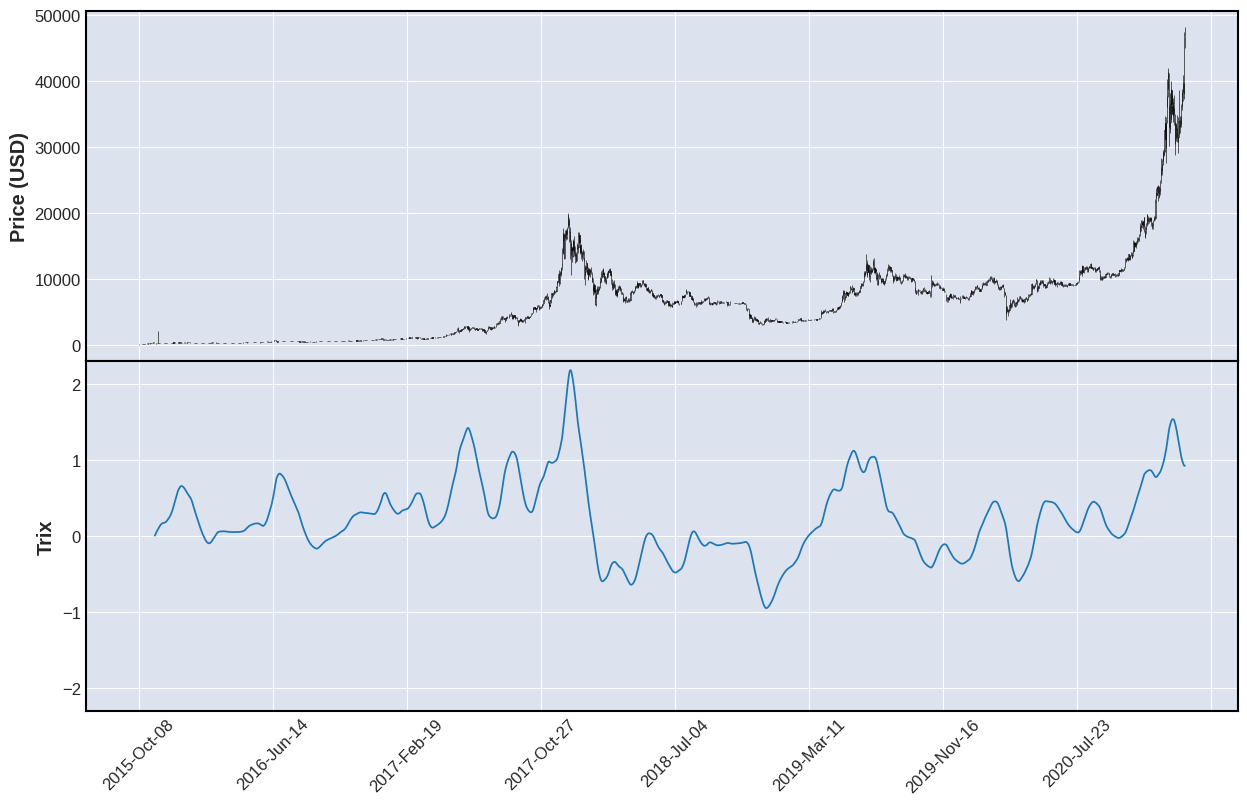

In [48]:
ap = mpf.make_addplot(df.ta.trix()["TRIX_30_9"].loc['2010-11-01':'2021-02-16'], panel=1, type='line',
                      ylabel='Trix', ylim=(-2.3,2.3))
mpf.plot(df.loc['2010-11-01':'2021-02-16'], ylabel='Price (USD)',
         type='candle', addplot=ap,panel_ratios=(1,1),figratio=(1,1),figscale=1.5, figsize=(16, 10))

TODO:
------
* horizontal line at x=0
* Get more historical data
* colors for below zero and above zero, downwards and upwards
* Markers for when oscillator goes above / below zero

In [37]:
import matplotlib.axes   as mpl_axes